# stSME normalization & imputation effects

This tutorial shows the stSME normalization effect between of two scenarios: 
- (1) normal (without stSME) 
- (2) stSME applied on raw gene counts

In this tutorial we use **Mouse Brain (Coronal)** Visium dataset from [10x genomics website](https://support.10xgenomics.com/spatial-gene-expression/datasets/1.0.0/V1_Adult_Mouse_Brain).

In [1]:
# import module
import stlearn as st
from pathlib import Path
st.settings.set_figure_params(dpi=180)

In [2]:
# specify PATH to data
BASE_PATH = Path("/home/uqysun19/60days/10x_visium/mouse_brain_coronal")

# spot tile is the intermediate result of image pre-processing
TILE_PATH = Path("/tmp/tiles")
TILE_PATH.mkdir(parents=True, exist_ok=True)

# output path
OUT_PATH = Path("/home/uqysun19/60days/stlearn_plot/mouse_brain_coronl")
OUT_PATH.mkdir(parents=True, exist_ok=True)

In [3]:
# load data
data = st.Read10X(BASE_PATH)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
# pre-processing for gene count table
st.pp.filter_genes(data,min_cells=1)
st.pp.normalize_total(data)
st.pp.log1p(data)

Normalization step is finished in adata.X
Log transformation step is finished in adata.X


In [5]:
# pre-processing for spot image
st.pp.tiling(data, TILE_PATH)

# this step uses deep learning model to extract high-level features from tile images
# may need few minutes to be completed
st.pp.extract_feature(data)

Tiling image: 100%|██████████ [ time left: 00:00 ]
Extract feature: 100%|██████████ [ time left: 00:00 ]


The morphology feature is added to adata.obsm['X_morphology']!


In [6]:
# run PCA for gene expression data
st.em.run_pca(data,n_comps=50)

PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


### (1) normal (without stSME) 

In [7]:
data_normal = data.copy()

#### marker gene for CA3

/home/uqysun19/90days/.conda/envs/stlearn/lib/python3.8/site-packages/stlearn/plotting/gene_plot.py:140: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, aspect=10, shrink=0.5, cmap=cmap)


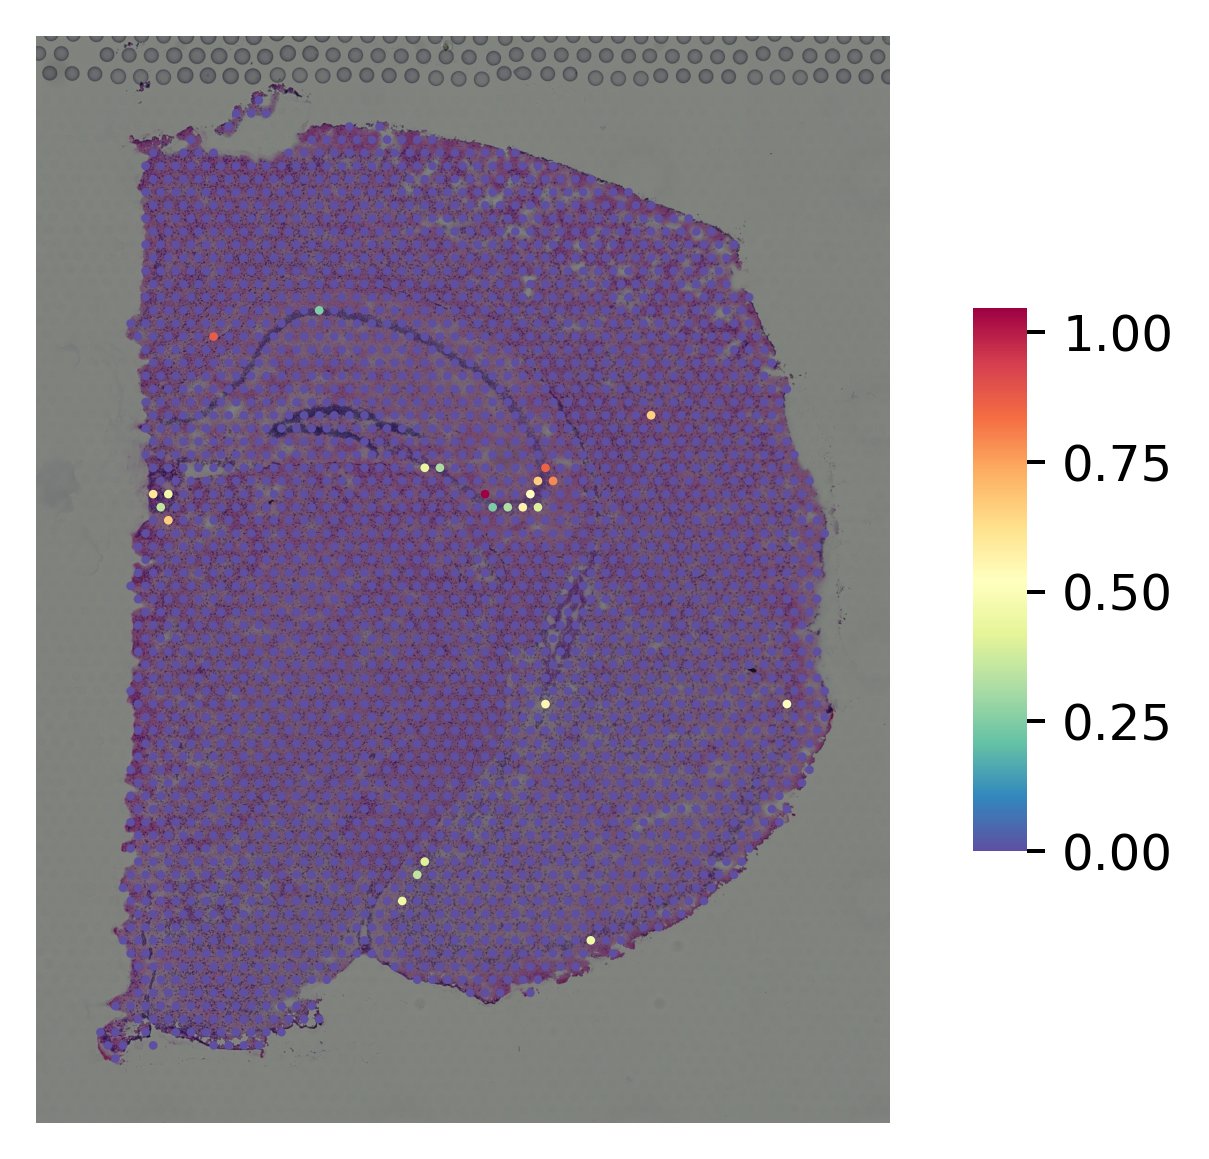

In [8]:
i="Lhfpl1"
st.pl.gene_plot(data_normal, gene_symbols=i, size=3,
                    fname=str(OUT_PATH) + "/without_SME_{}".format(str(i)) + ".png")

#### marker gene for DG

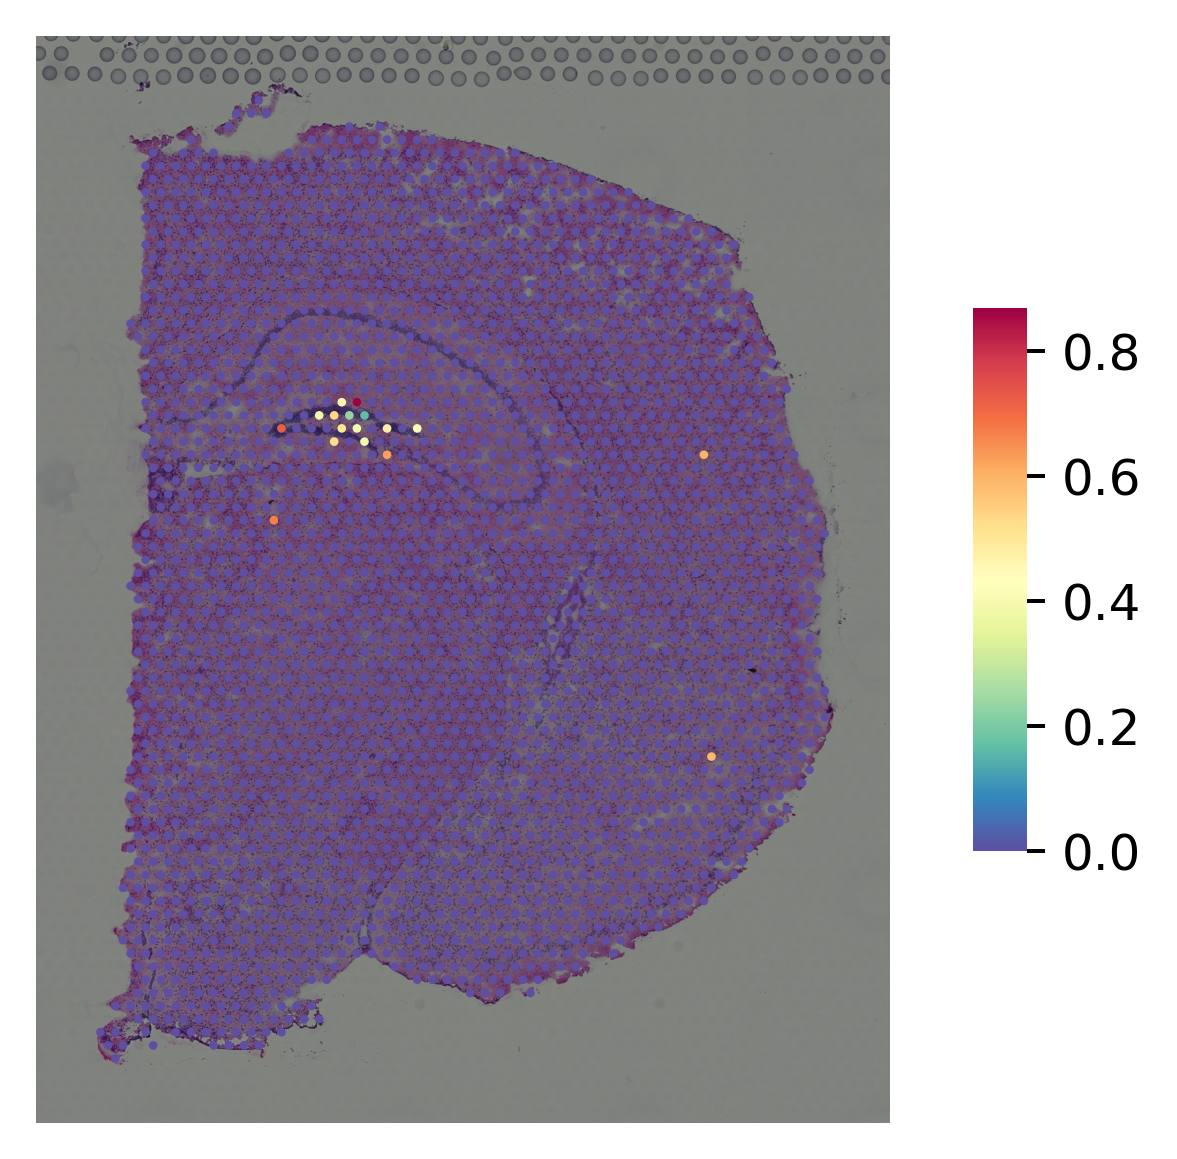

In [9]:
i="Pla2g2f"
st.pl.gene_plot(data_normal, gene_symbols=i, size=3,
                    fname=str(OUT_PATH) + "/without_SME_{}".format(str(i)) + ".png")

### (2) stSME applied on raw gene counts

In [10]:
data_SME = data.copy()
# apply stSME to normalise log transformed data
st.spatial.SME.SME_normalize(data_SME, use_data="raw")
data_SME.X = data_SME.obsm['raw_SME_normalized']
st.em.run_pca(data_SME,n_comps=50)

Adjusting data: 100%|██████████ [ time left: 00:00 ]


The data adjusted by SME is added to adata.obsm['raw_SME_normalized']
PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


#### marker gene for CA3

/home/uqysun19/90days/.conda/envs/stlearn/lib/python3.8/site-packages/stlearn/plotting/gene_plot.py:140: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, aspect=10, shrink=0.5, cmap=cmap)


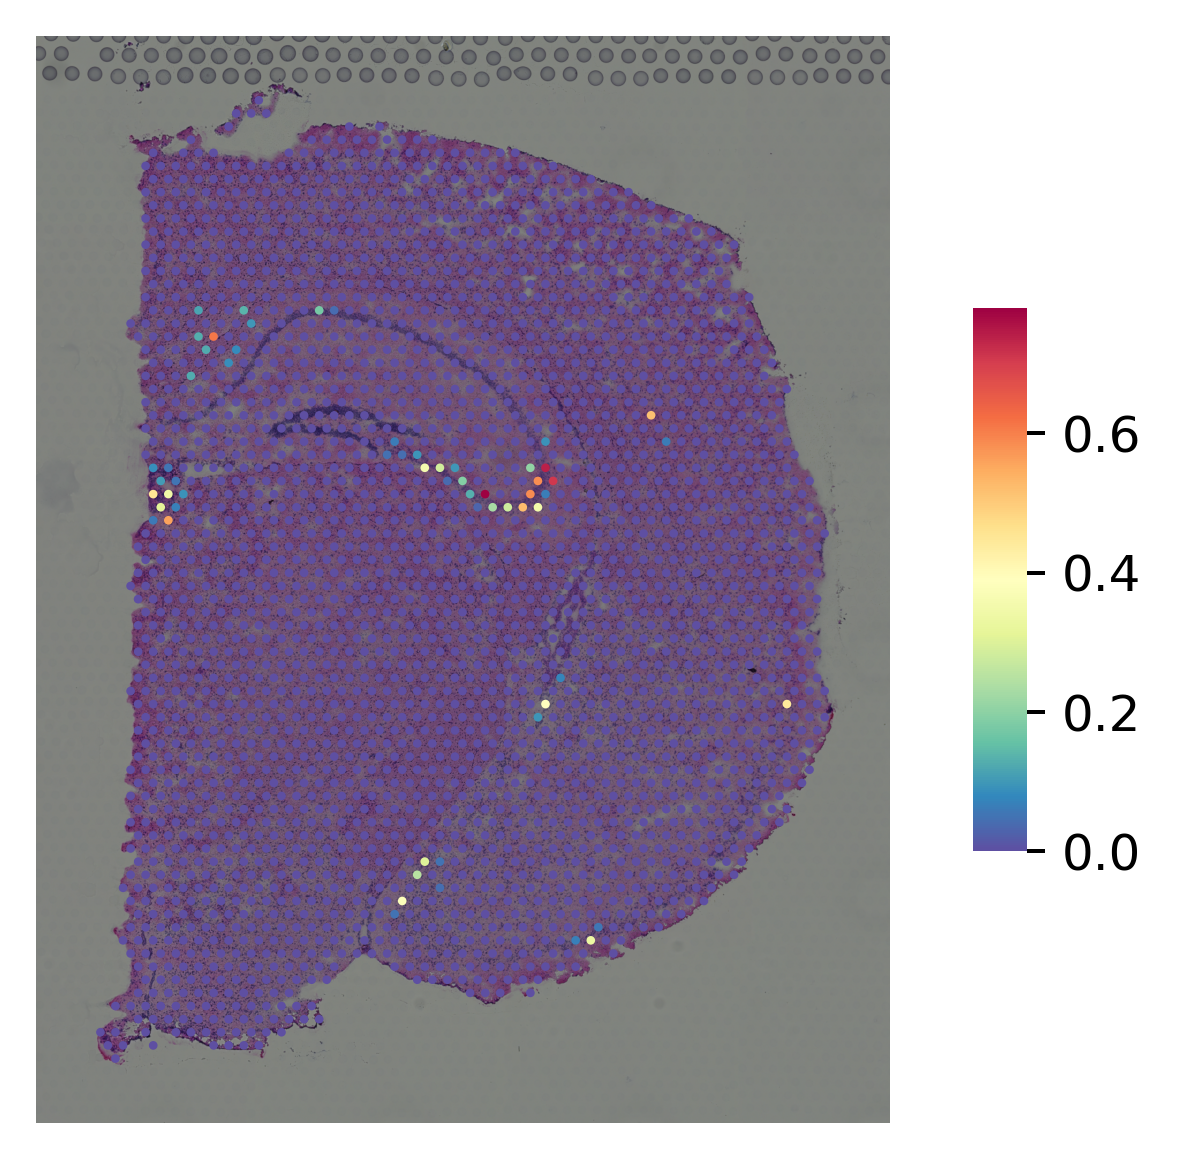

In [11]:
i="Lhfpl1"
st.pl.gene_plot(data_SME, gene_symbols=i, size=3,
                    fname=str(OUT_PATH) + "/without_SME_{}".format(str(i)) + ".png")

#### marker gene for DG

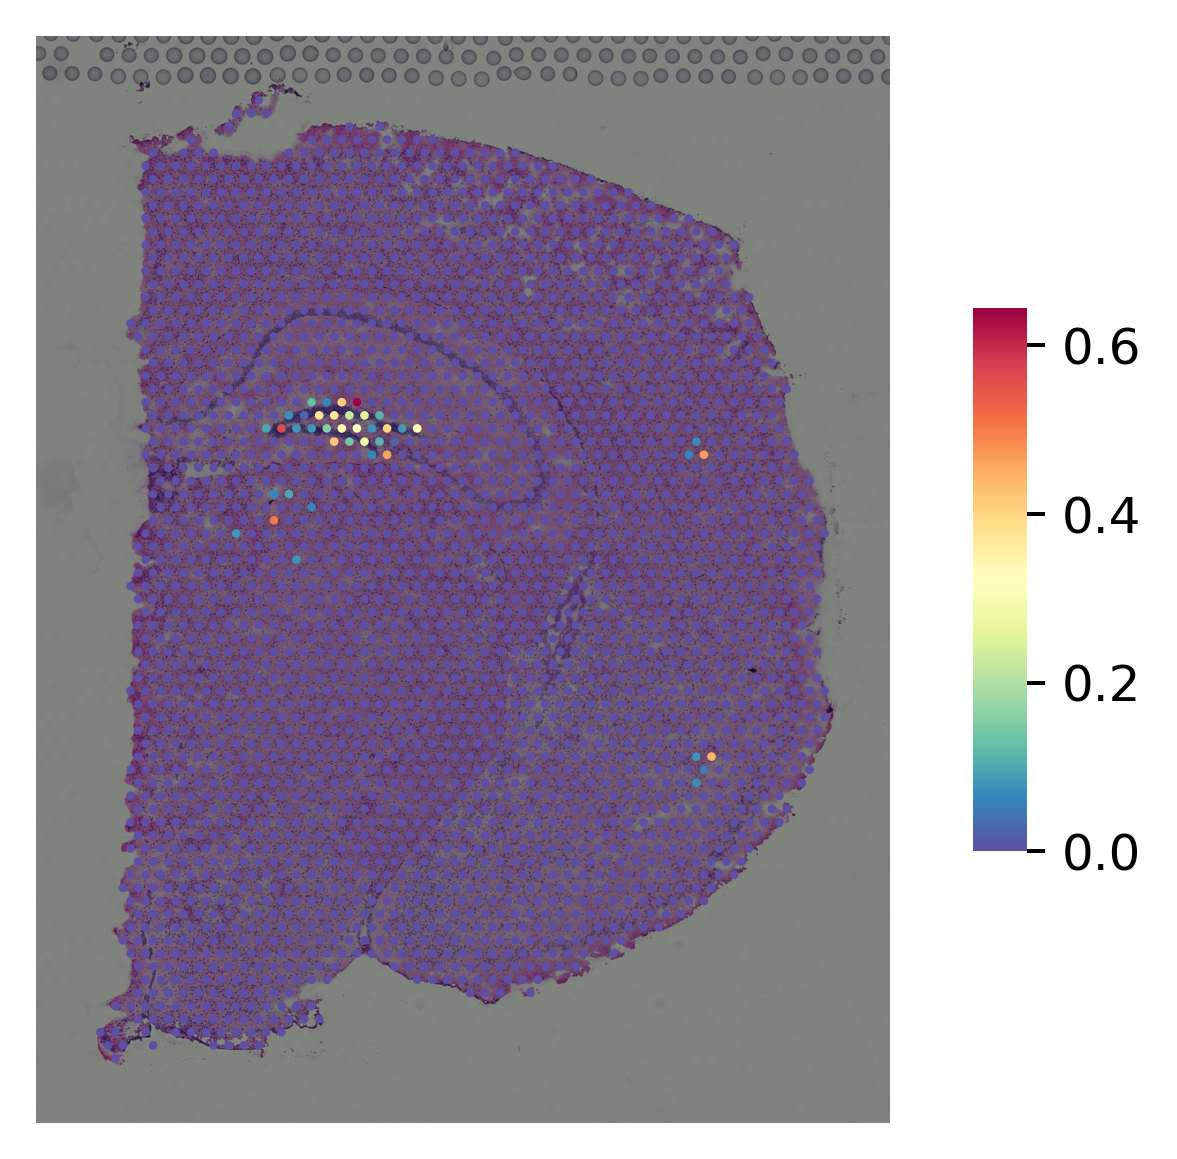

In [12]:
i="Pla2g2f"
st.pl.gene_plot(data_SME, gene_symbols=i, size=3,
                    fname=str(OUT_PATH) + "/without_SME_{}".format(str(i)) + ".png")